# 1. Conversion Probabilities (Frequentist Approach)

On your site, you may want to determine the proportion of users that clicked a certain widget or element on the page. Furthermore, you may have recently conducted an experiment whereby a new version of said widget/element has been changed and you want to compare its performance to your control (current) widget. This is when you will want to perform a statistical test to determine whether a statistically significant difference between groups exists.

As this notebook focuses on a frequentist approach to significance testing, you will hopefully have performed power analyses prior your experiment, in order to determine an adequate enough sample size to pause your experiment. If you have not done so, I have previously developed code in R, that enables you to determine how much of a sample (per variant) is required to reach a statistically conclusive result: 

[Sample-size Calculation in R - Code (Frank Hopkins, 2020)](https://towardsdatascience.com/ab-sample-size-calculation-in-r-ad959a4443a2)

Here you can specify your current conversion probability and your desired uplift (minimum detectable change).

This approach is broken down into absolute and relative differences, respectively and was adapted from the introduction to A/B Testing course by Udacity. This method uses confidence intervals to determine whether or not to reject your null hypothesis. This is achieved by calculating a pooled standard error of your two groups (which is the pooled probability of a click divided by the pooled sameple of the groups) and the difference between the predicted probability conversions for each group.

For sake of this analysis and subsequent work books. We are going compare the results of an A/B Test I have made up whereby we are testing two different widget images to promote a Keanu Reaves boxset on www.abtestnostalgicfilms.com (this is not a real website). Major stakeholders at abtestnostalgic films are worred that the image of Keanu in Bill and Ted will not be with familar younger audiences, so are running an A/B test to measure the impact on performance. People in this experiment will be evenly distributed into two variants where they will see one of two images in the promotion:

![](keanu_comp.png)


Now, lets get into it.

Your first going to want to import all the relevant packages for analysis:

In [1]:
import math as mt
import numpy as np
import pandas as pd
import seaborn as sb
from scipy.stats import norm
import matplotlib.pyplot as plt

## Absolute differences

You're now going to want to insert the number of unique browsers/users that were in each bucket of your experiment:

In [6]:
n_control = 164246

n_variant = 174904

Now, input the number of unique events fired in each bucket. Using the example given above, this will be the number of unique clicks on your old and new widget/element:

In [7]:
e_control = 7883

e_variant = 10348

You can now create a pandas data-frame that contains this information and calculates the conversion probabilities of each respective experimental condition:

In [9]:
data = {'variant':  ['Control (Keanu - The Matrix)', 'Variant (Keanu - B & T)'],
        'n_users': [n_control, n_variant],
        'n_events': [e_control, e_variant],
        }

experiment_df = pd.DataFrame(data)

experiment_df['p_conversion'] = round(experiment_df['n_events'] / experiment_df['n_users'], 4,)

print(experiment_df)

                        variant  n_users  n_events  p_conversion
0  Control (Keanu - The Matrix)   164246      7883        0.0480
1       Variant (Keanu - B & T)   174904     10348        0.0592


For a more user/stake-holder friendly representation, you can present these probabilities as %s:

In [12]:
p_control = e_control/n_control

p_variant = e_variant/n_variant

print("The conversion probability of the Control (Keanu - The Matrix) group is",round(100 * p_control,4),"%")
print("The conversion probability of the Variant (Keanu - B & T) group is",round(100 * p_variant,4),"%")

The conversion probability of the Control (Keanu - The Matrix) group is 4.7995 %
The conversion probability of the Variant (Keanu - B & T) group is 5.9164 %


Next, you need to calculate the combined/pooled conversion probability:

In [13]:
p_pooled = (e_control + e_variant)/(n_control + n_variant)

print("The combined conversion probability is", round(100 * p_pooled,4),"%")

The combined conversion probability is 5.3755 %


And, the pooled standard error:

In [14]:
sd_pooled = mt.sqrt((p_pooled * (1 - p_pooled)) * (1/n_control + 1/n_variant))

print("The pooled standard deviation/error is",round(100 * sd_pooled,4),"%")

The pooled standard deviation/error is 0.0775 %


You can now calculate the estimated absolute difference between conversion probabilities:

In [15]:
e_diff = p_variant - p_control

print("The estimated difference is",round(100 * e_diff,4),"%")

The estimated difference is 1.1169 %


Below you can set your pre-experiment parameters. You can set your significance threshold (alpha) and select the corresponding z-score (this will be then used for computation below. You can also set a pratical significance threshold, which is the absolute difference that is relevant to this experiment in its commercial context (this value should be pre-determined before your experiment is conducted): 

In [16]:
alpha = 0.05

## Z score 0.9

z_90 = 1.645

## Z score 0.95

z_95 = 1.96

## Z score 0.99

z_99 = 2.576

# Practical significance

prac_sig = 0.005

Based on the parameters you have set above, you can now calculate the pooled margin of error:

In [17]:
me = z_95 * (sd_pooled)

print("The margin of error is",round(100 * me,4),"%")

The margin of error is 0.1519 %


You can now print the result of your experiment. The absolute difference and confidence intervals will be presented. The threshold for both statistical and practical significance is also provided:

In [18]:
## Overall change observed

print("The absolute change observed due to the experiment is", round(e_diff*100,2),"%")

## Confidence intervals

print("Confidence intervals: [",round(e_diff * 100 - me * 100, 4),"%","-",round(100 * e_diff + 100 * me,4),"%","]")

## Result of the experiment
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if the entire confidence interval is >",prac_sig * 100,"%",".")

The absolute change observed due to the experiment is 1.12 %
Confidence intervals: [ 0.965 % - 1.2688 % ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if the entire confidence interval is > 0.5 % .


As you can see above, the experiment reached both statistical and practical significance. If you want to present a visual with the raw users, events and conversion probabilities, you can execute the following code:

                        variant  n_users  n_events  p_conversion
0  Control (Keanu - The Matrix)   164246      7883        0.0480
1       Variant (Keanu - B & T)   174904     10348        0.0592


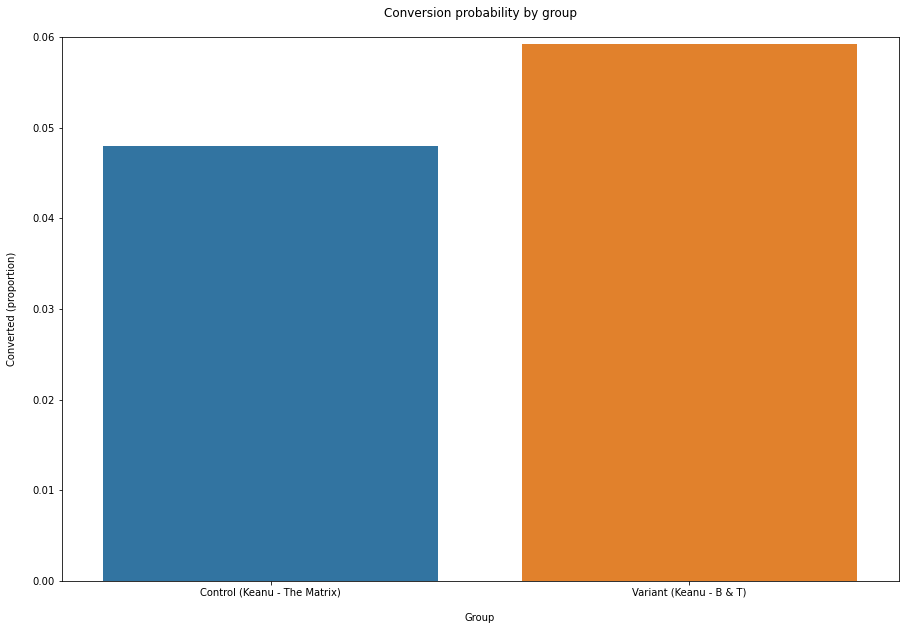

In [19]:
plt.figure(figsize=(15,10))
ax = sb.barplot(x=experiment_df['variant'], y=experiment_df['p_conversion'], ci=False)
plt.ylim(0, 0.06)
plt.title('Conversion probability by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
print(experiment_df)

## Relative differences

First, insert the number of unique browsers/users that were in each bucket of your experiment:

In [20]:
n_control = 164246

n_variant = 174904

Now, input the number of unique events fired in each bucket. Using the example given above, this will be the number of unique clicks on your old and new widget/element:

In [21]:
e_control = 7883

e_variant = 10348

You can now create a pandas data-frame that contains this information and calculates the conversion probabilities of each respective experimental condition:

In [22]:
data = {'variant':  ['Control (Keanu - The Matrix)', 'Variant (Keanu - B & T)'],
        'n_users': [n_control, n_variant],
        'n_events': [e_control, e_variant],
        }

experiment_df = pd.DataFrame(data)

experiment_df['p_conversion'] = round(experiment_df['n_events'] / experiment_df['n_users'], 4,)

print(experiment_df)

                        variant  n_users  n_events  p_conversion
0  Control (Keanu - The Matrix)   164246      7883        0.0480
1       Variant (Keanu - B & T)   174904     10348        0.0592


For a more user/stake-holder friendly representation, you can present these probabilities as %s:

In [23]:
p_control = e_control/n_control

p_variant = e_variant/n_variant

print("The conversion probability of the Control (Keanu - The Matrix) group is",round(100 * p_control,4),"%")
print("The conversion probability of the Variant (Keanu - B & T) group is",round(100 * p_variant,4),"%")

The conversion probability of the Control (Keanu - The Matrix) group is 4.7995 %
The conversion probability of the Variant (Keanu - B & T) group is 5.9164 %


Next, you need to calculate the combined/pooled conversion probability:

In [24]:
p_pooled = (e_control + e_variant)/(n_control + n_variant)

print("The combined conversion probability is", round(100 * p_pooled,4),"%")

The combined conversion probability is 5.3755 %


And, the pooled standard error:

In [25]:
sd_pooled = mt.sqrt((p_pooled * (1 - p_pooled)) * (1/n_control + 1/n_variant))

print("The pooled standard deviation/error is",round(100 * sd_pooled,4),"%")

The pooled standard deviation/error is 0.0775 %


You can now calculate the estimated relative difference between conversion probabilities:

In [26]:
e_diff = (p_variant/p_control)-1

print("The estimated difference is",round(100 * e_diff,4),"%")

The estimated difference is 23.2707 %


Below you can set your pre-experiment parameters. You can set your significance threshold (alpha) and select the corresponding z-score (this will be then used for computation below. You can also set a pratical significance threshold, which is the relative difference that is relevant to this experiment in its commercial context (this value should be pre-determined before your experiment is conducted):

In [27]:
alpha = 0.05

## Z score 0.9

z_90 = 1.645

## Z score 0.95

z_95 = 1.96

## Z score 0.99

z_99 = 2.576

# Practical significance

prac_sig = 0.2

In [28]:
## Overall change observed

print("The absolute change observed due to the experiment is", round(e_diff*100,2),"%")

## Confidence intervals

print("Confidence intervals: [",round(e_diff * 100 - me * 100, 4),"%","-",round(100 * e_diff + 100 * me,4),"%","]")

## Result of the experiment
print ("The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if the entire confidence interval is >",prac_sig * 100,"%",".")

The absolute change observed due to the experiment is 23.27 %
Confidence intervals: [ 23.1188 % - 23.4226 % ]
The change is statistically significant if the CI doesn't include 0. In that case, it is practically significant if the entire confidence interval is > 20.0 % .


As you can see above, the experiment reached both statistical and practical significance. If you want to present a visual with the raw users, events and conversion probabilities, you can execute the following code:

                        variant  n_users  n_events  p_conversion
0  Control (Keanu - The Matrix)   164246      7883        0.0480
1       Variant (Keanu - B & T)   174904     10348        0.0592


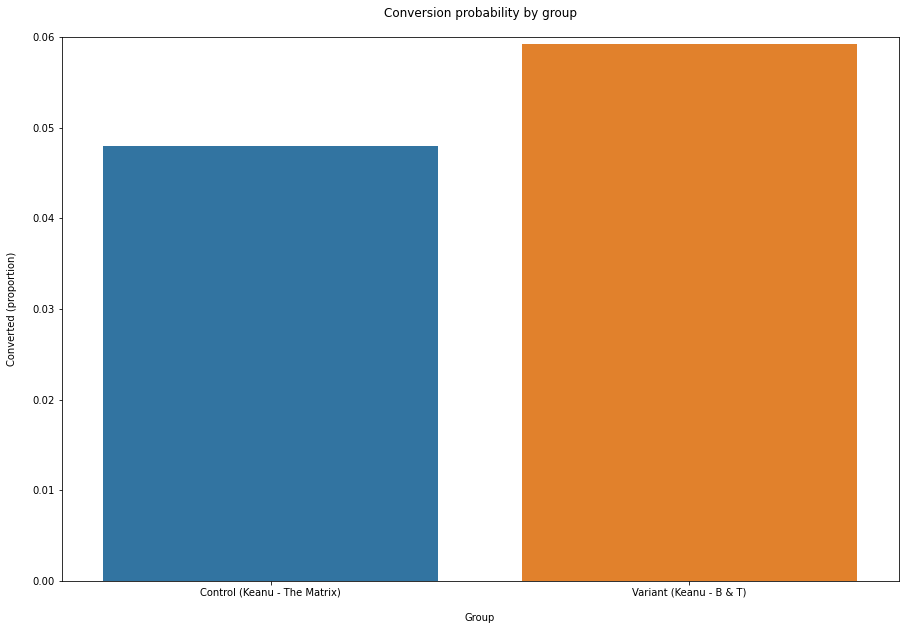

In [29]:
plt.figure(figsize=(15,10))
ax = sb.barplot(x=experiment_df['variant'], y=experiment_df['p_conversion'], ci=False)
plt.ylim(0, 0.06)
plt.title('Conversion probability by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15)
print(experiment_df)

The next chapter will tackle the same experiment using Bayesian methods for calculating the difference between conversion probabilities.